In [203]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
df = pd.read_excel("ECOMM DATA.xlsx")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [179]:
#Postal Code contains null values.
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [180]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [181]:
df.drop(labels=["Postal Code","Row ID","Ship Date","Ship Mode","Segment","Region","Order Priority"],axis= 1 ,inplace = True)

## BEST SELLING ITEMS 

# we are using the "product id" because it is corresponding to "order id"

In [182]:
#first best selling product 
df["Product ID"].mode()

0    OFF-AR-10003651
Name: Product ID, dtype: object

In [183]:
df["Product ID"].value_counts()
                                                      


Product ID
OFF-AR-10003651     35
OFF-AR-10003829     31
OFF-BI-10003708     30
OFF-BI-10002799     30
FUR-CH-10003354     28
                    ..
OFF-PA-10001448      1
OFF-EN-10001715      1
OFF-NOV-10000721     1
OFF-BOS-10001753     1
OFF-ENE-10003066     1
Name: count, Length: 10292, dtype: int64

In [184]:
df[df["Product ID"]== "OFF-AR-10003651"].shape[0]

35

In [185]:
df[df["Product ID"]== "OFF-AR-10003651"]["Product Name"].head(2)

8938     Sanford Pencil Sharpener, Easy-Erase
14632    Sanford Pencil Sharpener, Easy-Erase
Name: Product Name, dtype: object

In [186]:
df[df["Product ID"]== "OFF-AR-10003829"]["Product Name"].head(5)


14419        Stanley Markers, Fluorescent
14718    Boston Highlighters, Water Color
15636    Boston Highlighters, Water Color
17620        Stanley Markers, Fluorescent
19634        Stanley Markers, Fluorescent
Name: Product Name, dtype: object

In [187]:
# first best selling items are  Sanford Pencil Sharpener And Easy-Erase.
# second best selling product are  Stanley Markers, Fluorescent ,Boston Highlighters , Water Color.

## FINDING PRODUCTS GENERATING GOOD PROFIT

In [188]:
product_name_id_profit_sum = []

for product_id in df["Product ID"].unique():
    total_profit = df[df["Product ID"] == product_id]["Profit"].sum()
    Product_Name = df[df["Product ID"] == product_id]["Product Name"].iloc[0]
    product_name_id_profit_sum.append((product_id, total_profit,Product_Name))

product_name_id_profit_sum


[('TEC-AC-10003033',
  np.float64(3085.0324999999984),
  'Plantronics CS510 - Over-the-Head monaural Wireless Headset System'),
 ('FUR-CH-10003950',
  np.float64(-981.0674999999999),
  'Novimex Executive Leather Armchair, Black'),
 ('TEC-PH-10004664',
  np.float64(5455.948199999998),
  'Nokia Smart Phone, with Caller ID'),
 ('TEC-PH-10004583',
  np.float64(-270.43500000000006),
  'Motorola Smart Phone, Cordless'),
 ('TEC-SHA-10000501', np.float64(311.52), 'Sharp Wireless Fax, High-Speed'),
 ('TEC-PH-10000030',
  np.float64(3638.2740000000003),
  'Samsung Smart Phone, with Caller ID'),
 ('FUR-CH-10004050',
  np.float64(847.26),
  'Novimex Executive Leather Armchair, Adjustable'),
 ('FUR-TA-10002958',
  np.float64(140.46559999999874),
  'Chromcraft Conference Table, Fully Assembled'),
 ('OFF-BI-10003527',
  np.float64(7753.039000000001),
  'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind'),
 ('FUR-TA-10000198',
  np.float64(-2876.1156),
  'Chromcraft Bull-Nose

In [189]:
df1 = pd.DataFrame(product_name_id_profit_sum, columns=['product ID', 'profit',"Product_Name"])

In [190]:
df1.head(4)

,product ID,profit,Product_Name
0,TEC-AC-10003033,3085.0325,Plantronics CS510 - Over-the-Head monaural Wir...
1,FUR-CH-10003950,-981.0675,"Novimex Executive Leather Armchair, Black"
2,TEC-PH-10004664,5455.9482,"Nokia Smart Phone, with Caller ID"
3,TEC-PH-10004583,-270.4350,"Motorola Smart Phone, Cordless"


DATA FRAME "DF1" SHOWS THE PRODUCT NAME WITH PRODUCT ID IN SORTED MANNER WHERE WE CAN EASILY VISUALIZE PRODUCTS WHICH ARE GENERATING GOOD PROFIT. 

In [191]:
df1 = df1.sort_values(by="profit", ascending=False,ignore_index=True)
df1

,product ID,profit,Product_Name
0,TEC-CO-10004722,25199.9280,Canon imageCLASS 2200 Advanced Copier
1,OFF-AP-10004512,10345.5840,"Hoover Stove, Red"
2,TEC-PH-10004823,8121.4800,"Nokia Smart Phone, Full Size"
3,OFF-BI-10003527,7753.0390,Fellowes PB500 Electric Punch Plastic Comb Bin...
4,TEC-CO-10001449,6983.8836,Hewlett Packard LaserJet 3310 Copier
...,...,...,...
10287,TEC-MOT-10003050,-3998.6820,"Motorola Smart Phone, Cordless"
10288,TEC-PH-10002991,-4574.6439,"Apple Smart Phone, Full Size"
10289,TEC-MA-10000822,-4589.9730,Lexmark MX611dhe Monochrome Laser Printer
10290,OFF-AP-10001623,-4958.1630,"Hoover Stove, White"


In [192]:
df.head(3)

,Order ID,Order Date,Customer ID,Customer Name,City,State,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost
0,CA-2012-124891,2012-07-31,RH-19495,Rick Hansen,New York City,New York,United States,US,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57
1,IN-2013-77878,2013-02-05,JR-16210,Justin Ritter,Wollongong,New South Wales,Australia,APAC,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63
2,IN-2013-71249,2013-10-17,CR-12730,Craig Reiter,Brisbane,Queensland,Australia,APAC,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49


# MONTHLY SALE

In [193]:
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

In [194]:
df.head(2)

,Order ID,Order Date,Customer ID,Customer Name,City,State,Country,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,YearMonth
0,CA-2012-124891,2012-07-31,RH-19495,Rick Hansen,New York City,New York,United States,US,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,2012-07
1,IN-2013-77878,2013-02-05,JR-16210,Justin Ritter,Wollongong,New South Wales,Australia,APAC,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,2013-02


In [195]:
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

In [196]:
monthly_sales.head(5)

,YearMonth,Sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610


# TOP 10 CUSTOMERS (WE CAN USE THIS TO GIVE THEM DISCOUNT)

In [197]:
customer_order_counts = df.groupby("Customer Name")["Order ID"].count().reset_index()

In [198]:
customer_order_counts.columns = ['Customer Name', 'Order Count']

In [199]:
customer_order_counts = customer_order_counts.sort_values(by="Order Count", ascending=False,ignore_index=True)

In [200]:
customer_order_counts.head(10)

,Customer Name,Order Count
0,Muhammed Yedwab,108
1,Steven Ward,106
2,Bill Eplett,102
3,Gary Hwang,102
4,Patrick O'Brill,102
5,Harry Greene,101
6,Eric Murdock,100
7,Art Ferguson,98
8,Brosina Hoffman,97
9,Bart Watters,96


In [238]:
top_20_customer_order_counts = customer_order_counts.head(20)

#   DATA VISUALIZATION 

In [225]:
top_10_df = df1.head(10)

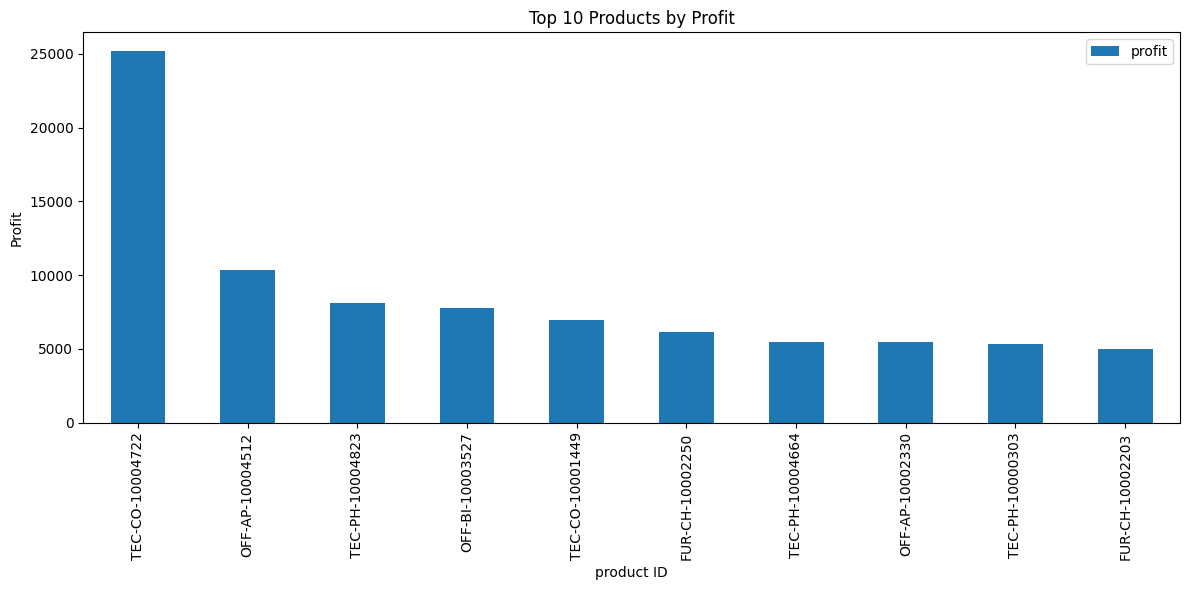

In [234]:
top_10_df.plot(x='product ID', y='profit', kind='bar', figsize=(12, 6))

# Adding labels and title
plt.title('Top 10 Products by Profit')
plt.xlabel('product ID')
plt.ylabel('Profit')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

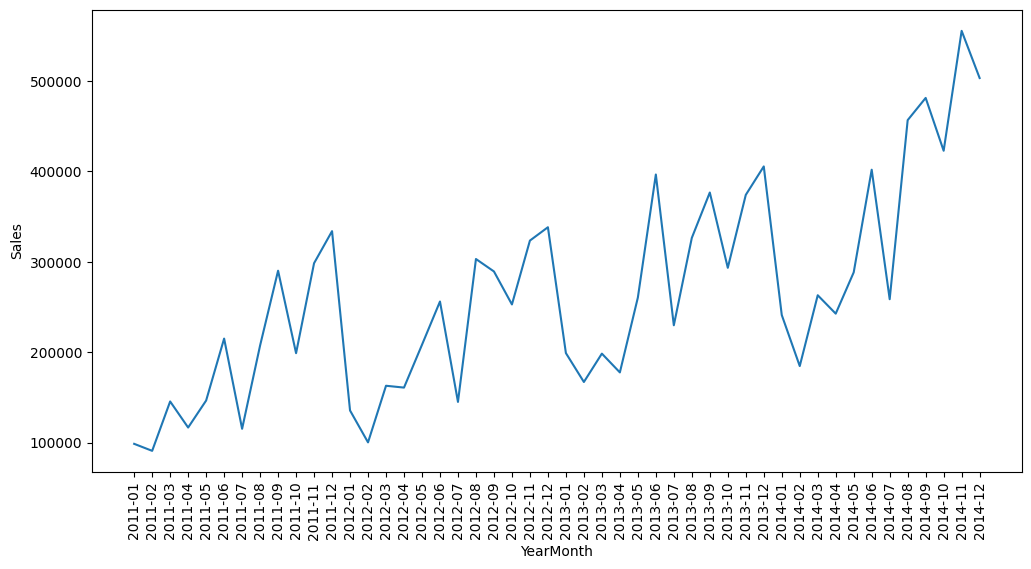

In [233]:
plt.figure(figsize=(12,6))
sns.lineplot(x='YearMonth', y='Sales',data=monthly_sales)
plt.xticks(rotation=90)
plt.show()


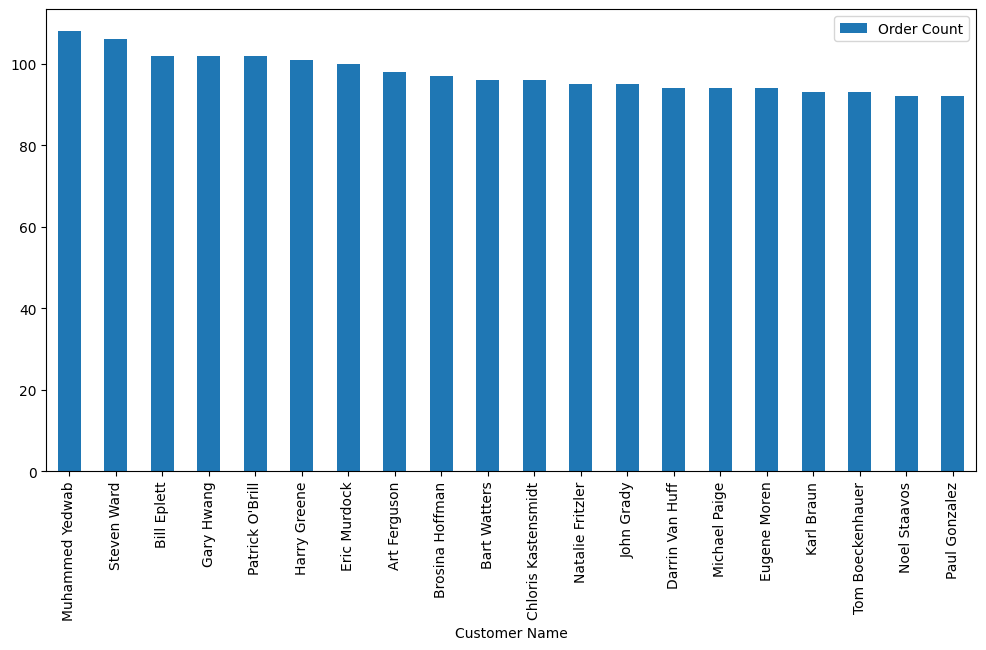

In [239]:
top_20_customer_order_counts.head(20).plot(x='Customer Name', y='Order Count', kind='bar', figsize=(12, 6))
plt.show()
